# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [2]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


None

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


В данных нет пропусков, все значения числовые.

Выбросы отсутствуют, кроме признака "TOC — общий органический углерод (%)". Минимальное значение ниже нуля, такого не может быть. Значение должно быть 0 или выше.

#### Для каждого числового признака построим гистограмму признаки и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. 

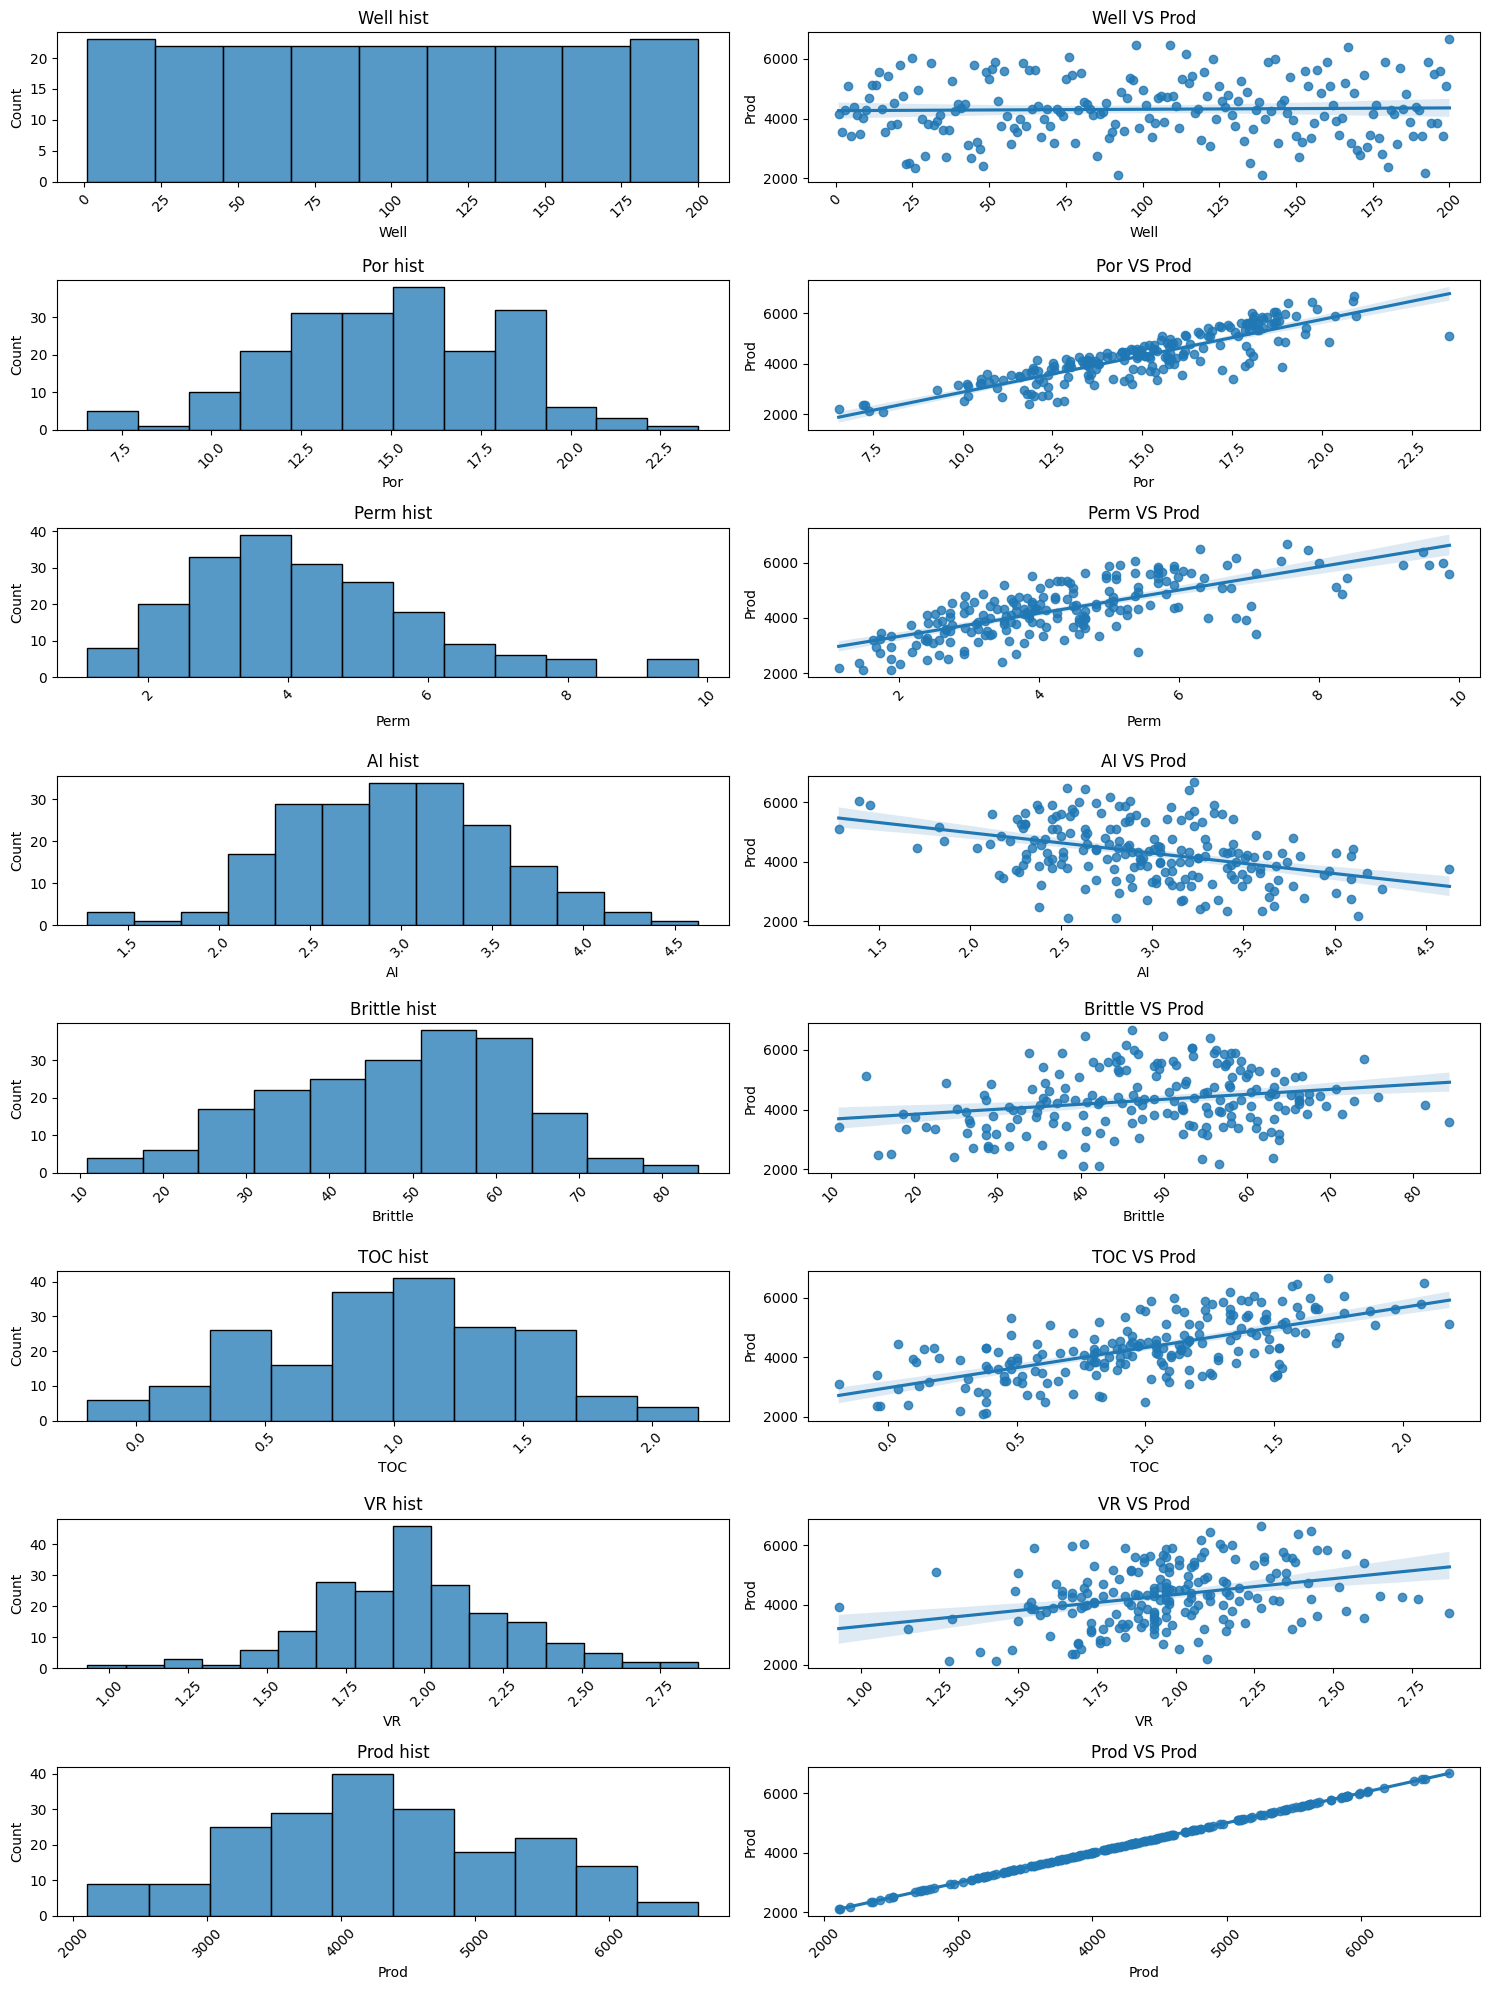

In [4]:
features = ['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

n = len(features) # количество признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей

#Создаем цикл для всех признаков из списка признаков
for i, feature in enumerate(features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейная регрессия
    regplot = sns.regplot(data=data, x=feature, y='Prod', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS Prod'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

Самый важный признак от которого зависит целевой признак 'Prod' - это Por — пористость скважины (%). Здесь самая высокая линейная зависимость (чем выше Por, тем больше Prod).

К важным признакам также можно отнести Perm и TOC. В них линейная зависимость с целевым признаком есть, но она меньше, чем в признаке Por.

Признак Well можно удалить. Это идентификатор скважины. Никакой зависимости с целевым признаком нет.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Rank: 8
Determinant: 0.0007299


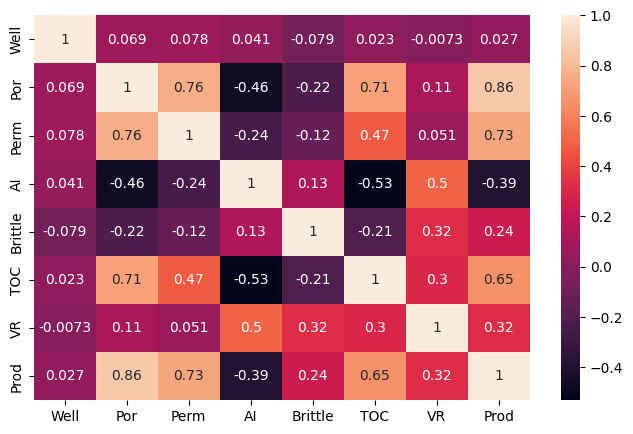

In [5]:
# расчёт корреляционной матрицы
data_corr = pd.DataFrame.corr(data)

# строим тепловую карту корреляций
fig = plt.figure(figsize=(8, 5))
sns.heatmap(data_corr, annot=True);

# ранг корреляционной матрицы
print('Rank:', np.linalg.matrix_rank(data_corr))

# определитель корреляционной матрицы
print('Determinant: {:.7f}'.format(np.linalg.det(data_corr)))

> *Выводы:*
1. Сильнее всего коррелируют с целевой переменной следующие факторы: Por, Perm, TOC.
2. Корреляционная матрица является плохо обусловенной (её опредитель близок к нулю).
3. Коллинеарности нет, т.к. нет линейной зависимости между факторами (ранг матрицы максимальный), но присутствует мультиколлинеарность, т.к. есть факторы с сильной корреляционной зависимостью (выше 0.7), об этом говорит и слишком низкий определитель матрицы.
4. Модель классической линейной регрессии по методу МНК в данном случае применима. В реализации линейной регрессии в sklearn предусмотрена борьба с плохо определёнными (близкими к вырожденным и вырожденными) матрицами. Для этого используется метод под названием - сингулярное разложение.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [6]:
# X - матрица наблюдений, y - вектор правильных ответов
X = data.drop('Prod', axis=1)
y = data['Prod']

# добавляем столбец с единицами для умножения на свободный член w0
A = np.column_stack((np.ones(200), X))

# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y

#Составляем таблицу из признаков (к признакам сразу добавим w0) и их коэффициентов
features = ['w0', 'Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']
w_hat_data = pd.DataFrame({'Features': features, 'Coefficients': np.round(w_hat)})
w_hat_data

,Features,Coefficients
0,w0,-1232.0
1,Well,0.0
2,Por,230.0
3,Perm,116.0
4,AI,-365.0
5,Brittle,25.0
6,TOC,-78.0
7,VR,785.0


> *Выводы:*
1. Признак Well является неинформативным, т.к. его коэффициент равен нулю.
2. Интерпретация коэффициентов: если Por — пористость скважины увеличится на 1%, то добыча газа в сутки увеличится на 230 млн. кубических футов. Если AI — акустический импеданс увеличится на 1 кг/м2*10**6, то добыча газа в сутки уменьшиться на 365 млн. кубических футов.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [7]:
# параметры одной скважины
X_1 = np.array([[106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]])
y_1 = 4748.315024

# добавляем столбец с единицами для умножения на свободный член w0
A_1 = np.column_stack((np.ones(1), X_1))

# прогноз для одной скважины
y_1_pred = A_1@w_hat
print('Прогноз для скажины:', y_1_pred)
MAE = np.abs(y_1_pred- y_1)
print('MAE для одной скважины:', MAE)

# прогноз для всех скважин
y_pred = A@w_hat
MAPE = (abs((y - y_pred) / y).mean() * 100)
print('MAPE для всех скважин:', MAPE)

Прогноз для скажины: [4723.06405371]
MAE для одной скважины: [25.25097029]
MAPE для всех скважин: 3.6279468451339723


> *Выводы:*

Значение MAPE означает, что средняя разница между прогнозируемым значением и фактическим значением составляет 3.6%.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

,Features,Coefficients
0,w0,-1232.0
1,Well,0.0
2,Por,230.0
3,Perm,116.0
4,AI,-365.0
5,Brittle,25.0
6,TOC,-78.0
7,VR,785.0


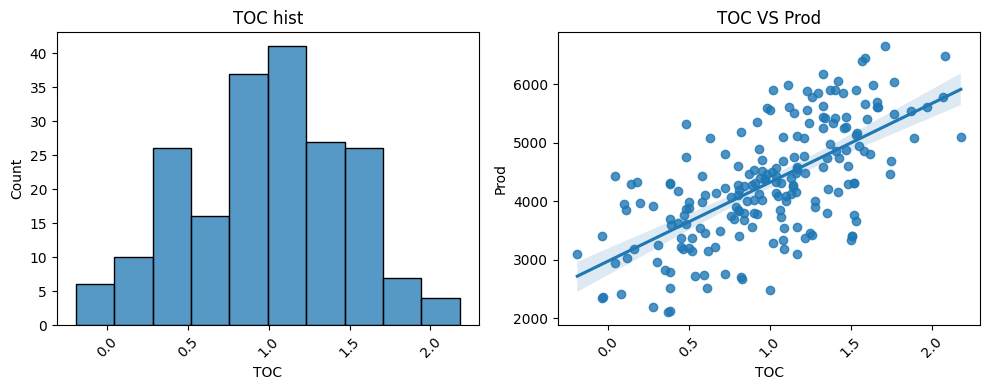

In [8]:
# таблица из признаков и их коэффициентов
display(w_hat_data)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
#Строим гистограмму распределения признака 
histplot = sns.histplot(data=data, x='TOC', ax=axes[0])
#Добавляем подпись графику
histplot.set_title('{} hist'.format('TOC'))
#Добавляем поворот отметок на оси абсцисс
histplot.xaxis.set_tick_params(rotation=45)
#Строим диаграмму рассеяния + линейная регрессия
regplot = sns.regplot(data=data, x='TOC', y='Prod', ax=axes[1])
#Добавляем подпись графику
regplot.set_title('{} VS Prod'.format('TOC'));
#Добавляем поворот отметок на оси абсцисс
regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

In [9]:
display(data_corr['TOC'][7])

0.6544451995719837

> *Выводы:*
1. Есть фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции. Это TOC = -78. Коэффициент говорит о том, что зависимость между процентом органического углерода и производительностью скважины обратная. Но коэффициент корреляции между этим фактором и целевым признаком равен 0.65, что обозначает прямую зависимость.
2. Такой результат объяснятся сильной мультиколлинеарностью в данных.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

,Features,Coefficients
0,w0,-1835.0
1,Por,293.0
2,AI,-200.0
3,Brittle,28.0
4,VR,517.0


MAPE для всех скважин: 4.0


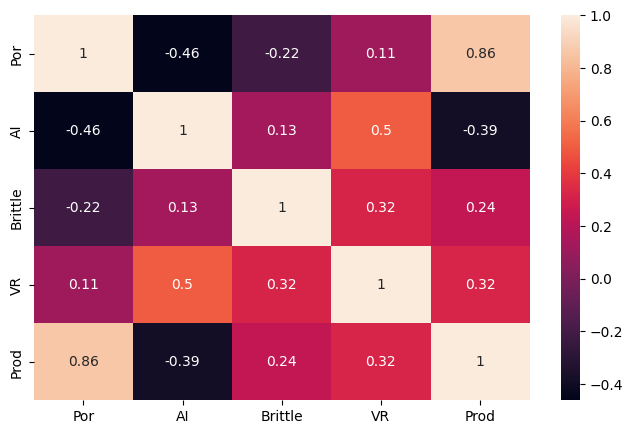

In [10]:
# новые данные с исключенными признаками
data_new = data[['Por', 'AI', 'Brittle', 'VR', 'Prod']]

# расчёт корреляционной матрицы
data_new_corr = pd.DataFrame.corr(data_new)

# строим тепловую карту корреляций
fig = plt.figure(figsize=(8, 5))
sns.heatmap(data_new_corr, annot=True);

# X_new - матрица наблюдений, y_new - вектор правильных ответов
X_new = data_new.drop('Prod', axis=1)
y_new = data_new['Prod']

# добавляем столбец с единицами для умножения на свободный член w0
A = np.column_stack((np.ones(200), X_new))

# вычислим OLS-оценку для коэффициентов
w_hat_new = np.round(np.linalg.inv(A.T@A)@A.T@y)

#Составляем обновленную таблицу из признаков (к признакам сразу добавим w0) и их коэффициентов
features_new = ['w0', 'Por', 'AI', 'Brittle', 'VR',]
w_hat_data = pd.DataFrame({'Features': features_new, 'Coefficients': w_hat_new})
display(w_hat_data)

# прогноз для всех скважин
y_pred_new = A@w_hat_new
MAPE = round(abs((y_new - y_pred_new) / y_new).mean() * 100, 1)
print(f'MAPE для всех скважин: {MAPE}')

> *Выводы:*
1. Интерпретация коэффициентов: если Por — пористость скважины увеличится на 1%, то добыча газа в сутки увеличится на 293 млн. кубических футов. Если AI — акустический импеданс увеличится на 1 кг/м2*10**6, то добыча газа в сутки уменьшиться на 200 млн. кубических футов.  
Значения изменились (Por с 230 на 293, AI с -365 на -200 ).
2. Метрика MAPE ухудшилась, была 3,6 стала 4.
3. После удаления сильно коррелированных признаков, противоречий коэффициентов линейной регрессии и коэффициентов корреляции нет.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [11]:
# создаём модель линейной регрессии на обновлённых после удаления факторов
model = LinearRegression()

# вычисляем коэффициенты регрессии
model.fit(X_new, y_new)
y_pred = model.predict(X_new) 

#Составляем таблицу из признаков и их коэффициентов
w_data = pd.DataFrame({'Features': X_new.columns, 'Coefficients': model.coef_.round()})
#Составляем строку таблицы со свободным членом
intercept_data =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': model.intercept_.round()})
coef_data = pd.concat([intercept_data, w_data], ignore_index=True)
display(coef_data)

# рассчитываем MAPE
print('MAPE для всех скважин: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_new, y_pred) * 100))

,Features,Coefficients
0,INTERCEPT,-1835.0
1,Por,293.0
2,AI,-200.0
3,Brittle,28.0
4,VR,517.0


MAPE для всех скважин: 4


> *Выводы:*

Коэффициенты линейной регрессии и метрика MAPE полученные вручную и с помощью библиотеки одинаковые.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [13]:
# выделяем интересующие нас факторы
X = data_new[['Por', 'AI', 'Brittle', 'VR']]
y = data_new[['Prod']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# количество получившихся факторов
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(X))
print("Количество получившихся факторов:", X.shape[1])

# создаём модель линейной регрессии
lr = LinearRegression()
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	

Ранг корреляционной матрицы: 34
Количество получившихся факторов: 34
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


> *Выводы:*

1. Ранг матрицы корреляций максимален, то есть равен количеству факторов, поэтому и коэффициенты регрессии находятся в адекватных пределах.
2. Расхождение метрик между тренировочной и валидационной выборкой не большое, значит модель не переобучена.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [14]:
param = {
    'alpha': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
}

lasso = Lasso()

grid_search = GridSearchCV(
    estimator=lasso, 
    param_grid=param, 
    cv=5, 
    n_jobs = -1
)
grid_search.fit(X, y)
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=6)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

Наилучшие значения гиперпараметров: {'alpha': 6}
MAPE на тренировочных фолдах: 1.85 %
MAPE на валидационных фолдах: 2.28 %


> *Выводы:*

Нам удалось сократить разницу в метриках, тем самым уменьшив разброс ответов модели. 

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [15]:
param = {
    'alpha': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
}

ridge = Ridge()

grid_search = GridSearchCV(
    estimator=ridge, 
    param_grid=param, 
    cv=5, 
    n_jobs = -1
)
grid_search.fit(X, y)
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=1)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

Наилучшие значения гиперпараметров: {'alpha': 1}


MAPE на тренировочных фолдах: 1.83 %
MAPE на валидационных фолдах: 2.72 %


> *Выводы:*

Нам удалось сократить разницу в метриках, тем самым уменьшив разброс ответов модели. Но это все равно хуже, чем L1-регуляризация.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [16]:
param = {
    'alpha': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
elastic_net = ElasticNet()

grid_search = GridSearchCV(
    estimator=elastic_net, 
    param_grid=param,
    cv=5, 
    n_jobs = -1
)
grid_search.fit(X, y)
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))


# создаём модель линейной регрессии c L1- и L2-регуляризациями
lasso = ElasticNet(alpha=6, l1_ratio=1)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100)) 

Наилучшие значения гиперпараметров: {'alpha': 6, 'l1_ratio': 1}
MAPE на тренировочных фолдах: 1.85 %
MAPE на валидационных фолдах: 2.28 %


> *Выводы:*

Elastic-Net позволяет сократить разницу в метриках, тем самым уменьшив разброс ответов модели. Но значения вышли такими же как и в L1-регуляризации.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [3]:
# pd.DataFrame({'Model':[LR, lasso, ridge, e_net],
#               'Params':['', str(lasso)[5:], str(ridge)[5:], str(e_net)[10:]],
#               'Poly':[True, True, True, True],
#               'Train':[LR_train, lasso_train, ridge_train, e_net_train],
#               'Test':[LR_test, lasso_test, ridge_test, e_net_test]})

pd.DataFrame({'Model':['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet'],
              'Params':['', 'alpha=5', 'alpha=0.2', 'alpha=5, l1_ratio=1'],
              'Poly':[True, True, True, True],
              'Train':[1.773, 1.828, 1.774, 1.828],
              'Test':[2.681, 2.276, 2.672, 2.276]})

,Model,Params,Poly,Train,Test
0,LinearRegression,,True,1.773,2.681
1,Lasso,alpha=5,True,1.828,2.276
2,Ridge,alpha=0.2,True,1.774,2.672
3,ElasticNet,"alpha=5, l1_ratio=1",True,1.828,2.276


> *Ваши выводы здесь*